# Landers' Datacamp Course: R

In [1]:
#keep it down!
shhh = function(...){
    suppressPackageStartupMessages(
        suppressWarnings(base::library(...)))
}

shhh(tidyverse)
shhh(psych)

## Module 2

In [2]:
#import and labeling
#create a df and name it

rt_df = read.csv("../data/landers_wk2data.csv", header = T)
str(rt_df)

'data.frame':	19 obs. of  3 variables:
 $ condition: Factor w/ 2 levels "A","B": 1 1 1 1 2 2 2 1 2 1 ...
 $ rt       : int  2283 1614 1183 419 1982 2733 1856 2599 2321 588 ...
 $ gender   : Factor w/ 3 levels "F","M","T": 2 2 2 1 1 1 2 2 1 1 ...


In [3]:
#recode condition and gender factors

rt_df = rt_df %>%
    mutate(condition = recode(condition, A = "Control", B = "Experimental"), 
           gender = recode(gender, M = "Male", F = "Female", T = "Transgender"))

In [4]:
#Analysis
#mean reaction time across rt_df

mean(rt_df$rt)

[1] 1768.579

In [5]:
#filter for female gender only

rt_f_df = rt_df %>%
    filter(gender == "Female")
rt_f_df

condition,rt,gender
Control,419,Female
Experimental,1982,Female
Experimental,2733,Female
Experimental,2321,Female
Control,588,Female
Control,1870,Female
Control,1432,Female
Control,2039,Female
Experimental,665,Female


In [6]:
#display frequences and/or quantitative summaries

summary(rt_f_df)
describe(rt_f_df)

        condition       rt               gender 
 Control     :5   Min.   : 419   Female     :9  
 Experimental:4   1st Qu.: 665   Male       :0  
                  Median :1870   Transgender:0  
                  Mean   :1561                  
                  3rd Qu.:2039                  
                  Max.   :2733                  

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
condition*,1,9,1.444444,0.5270463,1,1.444444,0.0000,1,2,1,0.1873942,-2.170370,0.1756821
rt,2,9,1561.000000,830.8685215,1870,1561.000000,668.6526,419,2733,2314,-0.1684997,-1.704868,276.9561738
gender*,3,9,1.000000,0.0000000,1,1.000000,0.0000,1,1,0,NaN,NaN,0.0000000


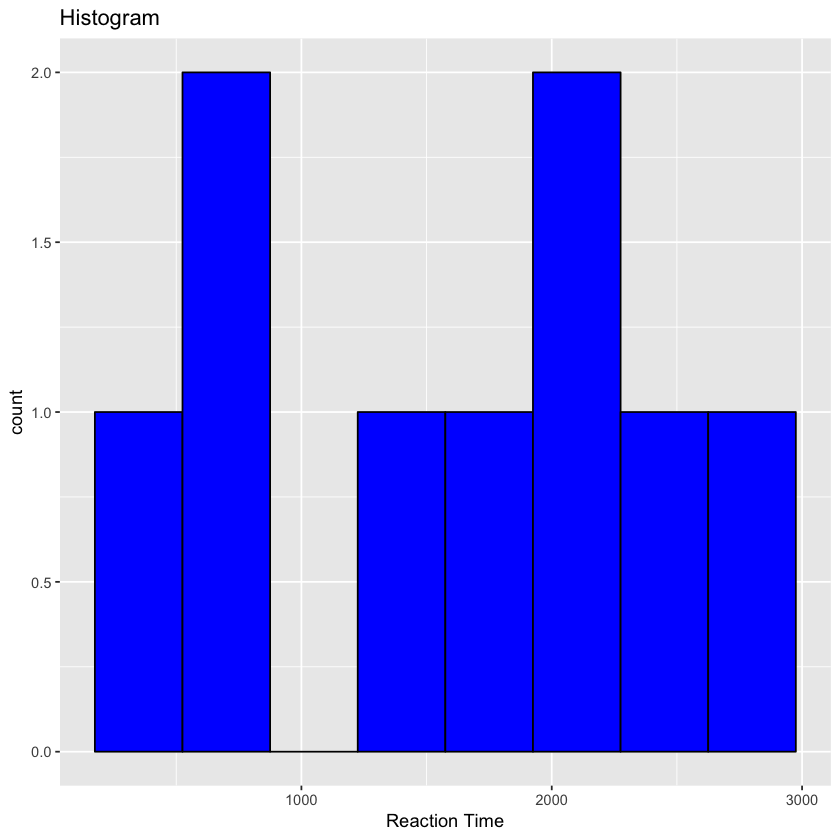

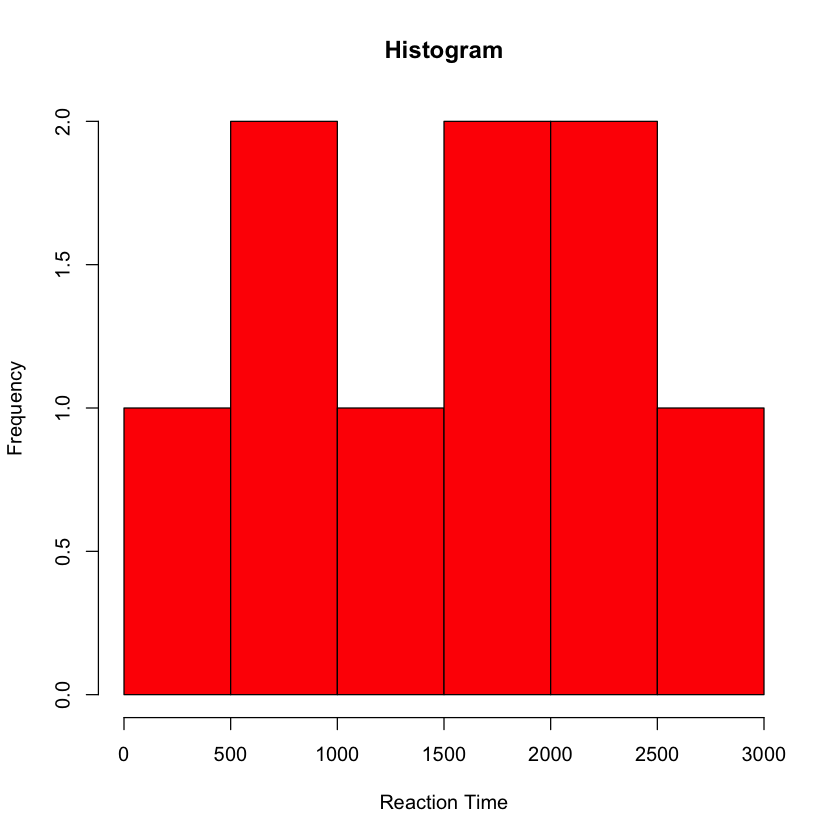

In [7]:
#create a histogram of female rt

ggplot(rt_f_df, aes(x = rt)) + 
    geom_histogram(binwidth = 350, color = "black", fill = "blue") +
    labs(title = "Histogram", x = "Reaction Time")
hist(rt_f_df$rt, xlab = "Reaction Time", main = "Histogram", col = "red")

In [8]:
#create a list with both dfs

datasets = list(rt_df, rt_f_df)
str(datasets)

List of 2
 $ :'data.frame':	19 obs. of  3 variables:
  ..$ condition: Factor w/ 2 levels "Control","Experimental": 1 1 1 1 2 2 2 1 2 1 ...
  ..$ rt       : int [1:19] 2283 1614 1183 419 1982 2733 1856 2599 2321 588 ...
  ..$ gender   : Factor w/ 3 levels "Female","Male",..: 2 2 2 1 1 1 2 2 1 1 ...
 $ :'data.frame':	9 obs. of  3 variables:
  ..$ condition: Factor w/ 2 levels "Control","Experimental": 1 2 2 2 1 1 1 1 2
  ..$ rt       : int [1:9] 419 1982 2733 2321 588 1870 1432 2039 665
  ..$ gender   : Factor w/ 3 levels "Female","Male",..: 1 1 1 1 1 1 1 1 1


In [9]:
#display contents of rt from first df within datasets
#datasets[1]

## Module 3

In [10]:
#read in raw data and create df
raw_df = read.csv("../data/landers_wk3data.csv", header = T)
str(raw_df)

'data.frame':	49 obs. of  14 variables:
 $ timeStart: Factor w/ 49 levels "2017-06-16 11:11:17",..: 1 3 6 5 2 4 11 37 30 33 ...
 $ timeEnd  : Factor w/ 49 levels "2017-06-16 11:18:36",..: 1 3 6 5 2 4 11 37 30 33 ...
 $ condition: Factor w/ 3 levels "A","B","C": 2 1 3 2 3 2 1 3 1 3 ...
 $ gender   : Factor w/ 2 levels "F","M": 1 2 2 2 2 1 1 2 2 1 ...
 $ q1       : int  5 2 5 4 3 4 2 4 2 3 ...
 $ q2       : int  4 4 5 3 1 3 4 2 5 4 ...
 $ q3       : int  4 3 2 4 3 2 1 5 3 2 ...
 $ q4       : int  1 1 1 2 5 3 3 1 4 4 ...
 $ q5       : int  4 3 1 2 4 3 5 5 4 1 ...
 $ q6       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ q7       : int  4 5 2 4 3 1 2 5 3 1 ...
 $ q8       : int  5 3 2 5 3 2 3 1 1 5 ...
 $ q9       : int  2 2 3 3 4 5 3 2 1 3 ...
 $ q10      : int  3 3 5 3 3 4 4 2 3 3 ...


In [11]:
# recast 'timeStart' & 'timeEnd' into POSIX format
raw_df = raw_df %>%
    mutate_at(vars('timeStart', 'timeEnd'), as.POSIXct)
#str(raw_df) #notice the vars changed from 'factor' to 'POSIX'

In [12]:
#research assistants participated during the month of June
#remove them and create a new df; q6 was check response item keyed for 1
clean_df = raw_df %>%
    filter_at(vars('timeStart', 'timeEnd', 'q6'), 
              any_vars(. >= "2017-07-01 00:00:00" & q6 == 1))

## M3.Analysis

In [13]:
#save total time spent on study in seconds as a new variable
#recast timeSpent as num
clean_df = clean_df %>%
    mutate('timeSpent_secs' = as.numeric(difftime(
            timeEnd, timeStart, units = 'secs')))

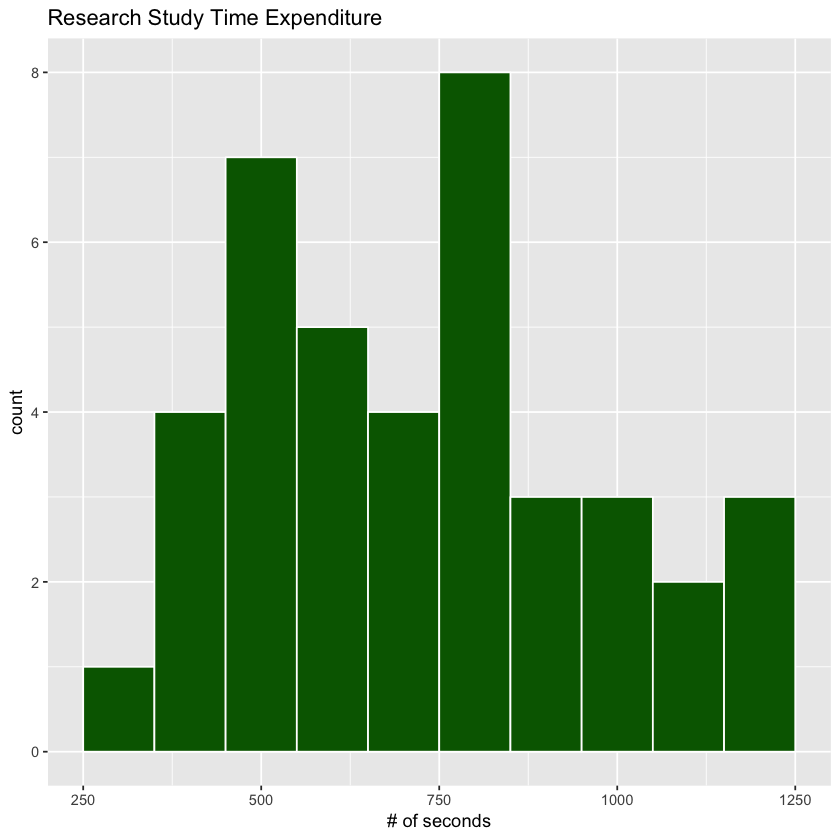

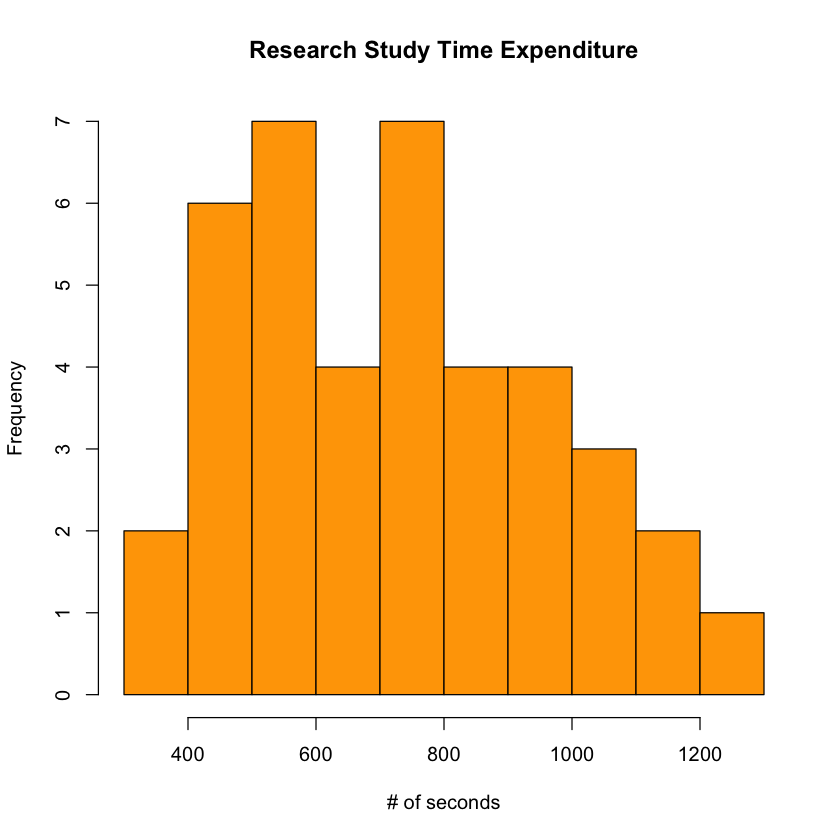

In [14]:
#create a histogram of timeSpent
ggplot(clean_df, aes(x = timeSpent_secs)) + 
    geom_histogram(binwidth = 100, color = "white", fill = "dark green") +
    labs(title = "Research Study Time Expenditure", x = "# of seconds")

hist(clean_df$timeSpent_secs, col = "orange", main = "Research Study Time Expenditure", 
     xlab = "# of seconds")

In [15]:
#iterate table function over the 5th and 14th columns of df
freq_tbls_list = lapply(clean_df[, c(5, 14)], table)
freq_tbls_list

#tidyverse syntax
# clean_df %>% 
#     select('q1', 'q10') %>%
#     lapply(table)

$q1

 1  2  3  4  5 
 4  7 11  9  9 

$q10

 1  2  3  4  5 
 7  9  6 12  6 


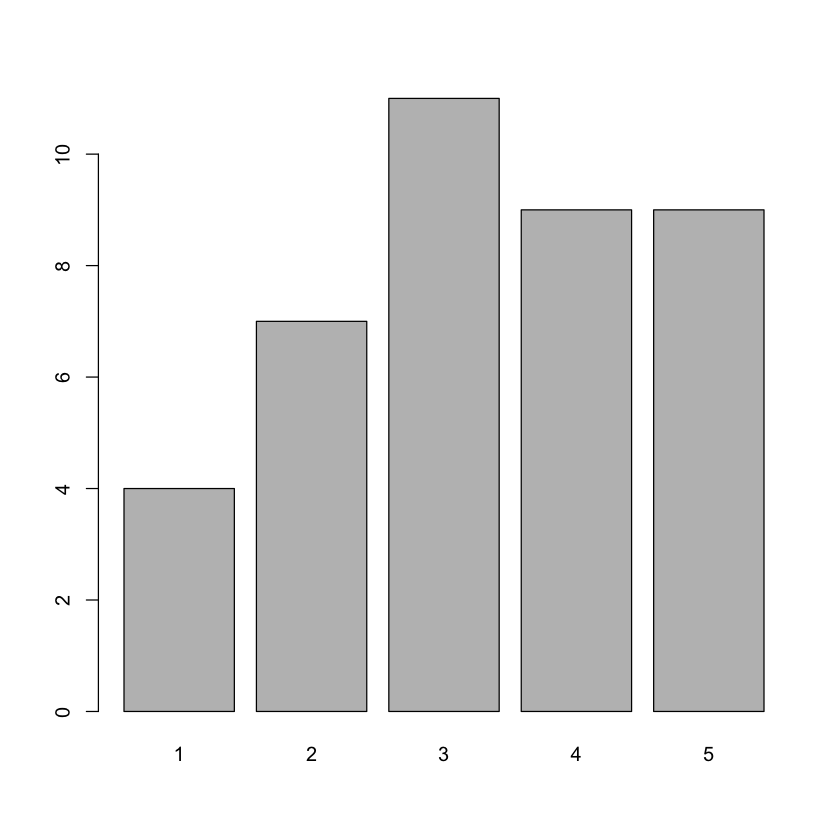

0.7
1.9
3.1
4.3
5.5
0.7
1.9
3.1
4.3
5.5


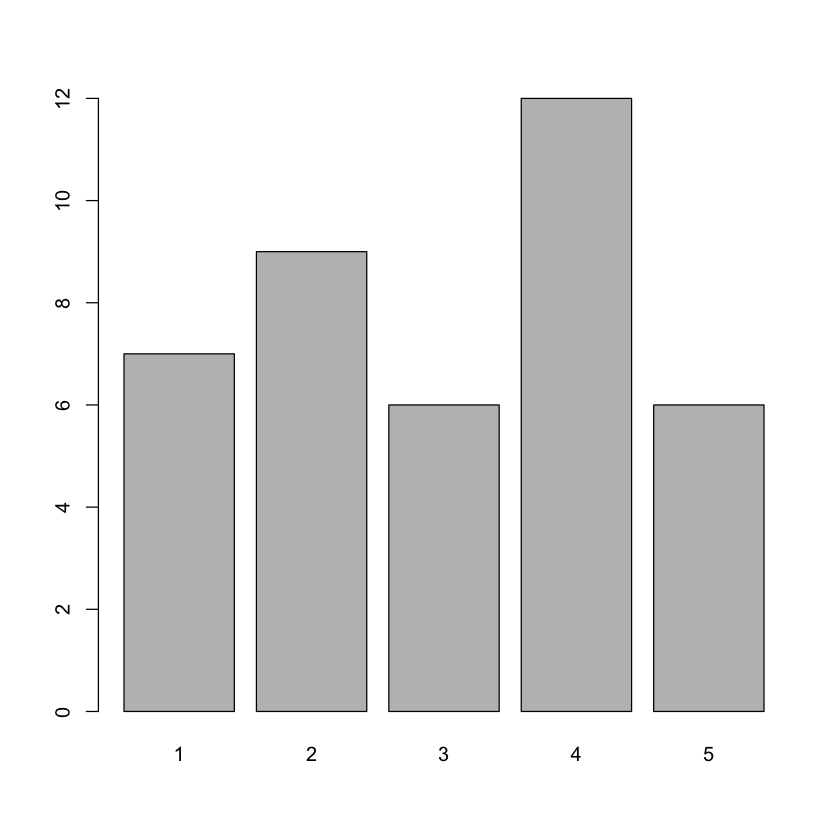

In [16]:
lapply(freq_tbls_list, barplot)